In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [10]:
import datetime
import pyucrio

rio = pyucrio.PyUCRio()

In [3]:
# First, let's make a single plot of Riometer data from a few sites
start_dt = datetime.datetime(2023, 11, 5, 0, 0)
end_dt = datetime.datetime(2023, 11, 5, 23, 59)
r_list = []

# Download NORSTAR Riometer data from a couple site, for a full day
dataset_name = "NORSTAR_RIOMETER_K2_TXT"
site_uid = ["chur","daws","rabb"]
for site in site_uid:
    r = rio.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site)
    r_list.append(r)

# Read in all the data
rio_data_list = []
for r in r_list:
    data = rio.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2) 
    rio_data_list.append(data)

In [4]:
print(rio_data_list[0].data[0].timestamp)

[datetime.datetime(2023, 11, 5, 0, 0, 1)
 datetime.datetime(2023, 11, 5, 0, 0, 6)
 datetime.datetime(2023, 11, 5, 0, 0, 11) ...
 datetime.datetime(2023, 11, 5, 23, 59, 46)
 datetime.datetime(2023, 11, 5, 23, 59, 51)
 datetime.datetime(2023, 11, 5, 23, 59, 56)]


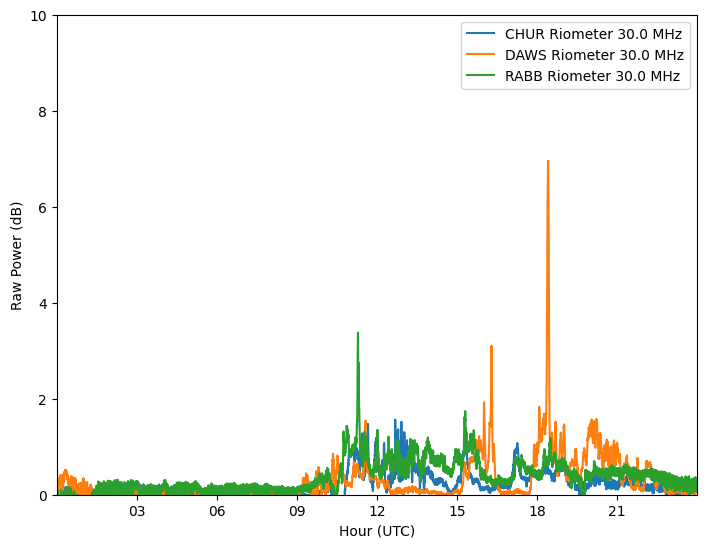

In [5]:
# First, let's create a quick plot of the raw data
rio.tools.plot(rio_data_list, yrange=(0, 10))

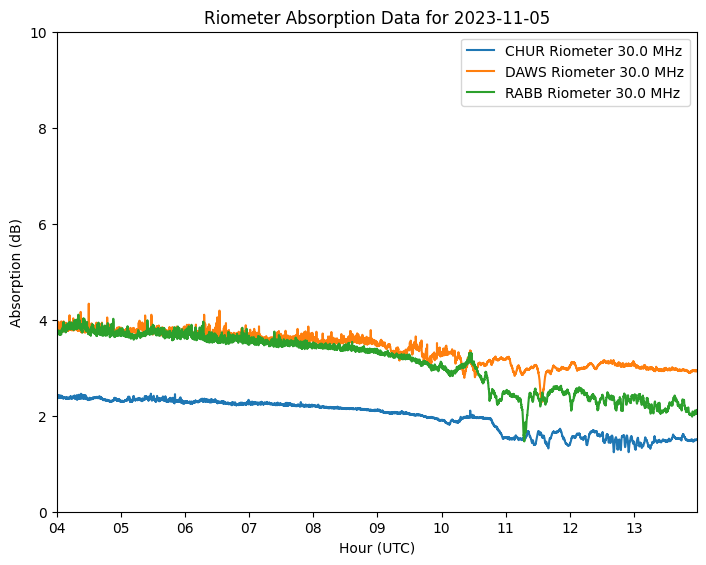

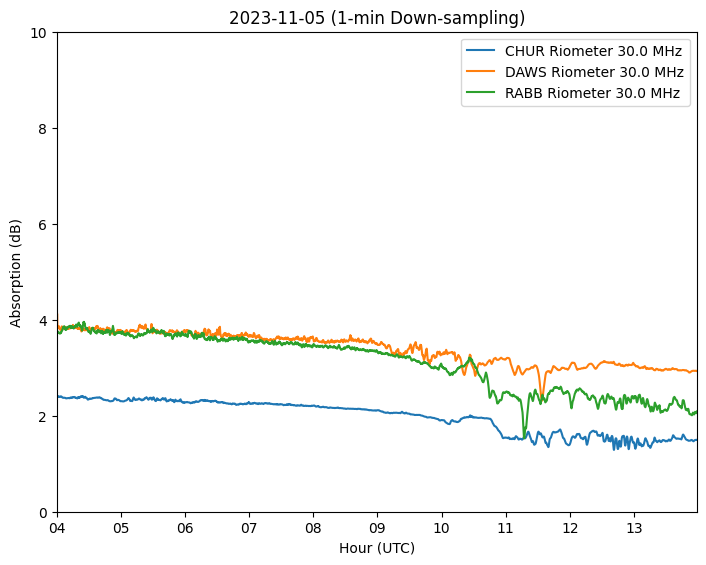

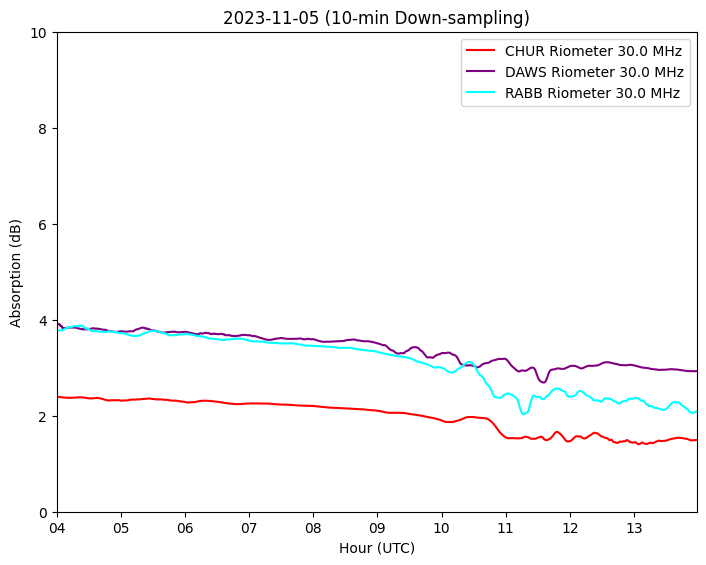

In [6]:
# Since we downloaded NORSTAR K2 files, which contain both raw and baselined
# data, we can also plot the absorption.

# Let's also restrict the plotting_range in the time axis
start_plot_dt = datetime.datetime(2023, 11, 5, 4, 0)
end_plot_dt = datetime.datetime(2023, 11, 5, 13, 59)

# Plot the absorption instead, using the absorption argument.
rio.tools.plot(rio_data_list, absorption=True, yrange=(0, 10), xrange=(start_plot_dt, end_plot_dt), title="Riometer Absorption Data for 2023-11-05")

# Plot again, this time down-sampling to 1-minute intervals
rio.tools.plot(rio_data_list,
               absorption=True,
               yrange=(0, 10),
               xrange=(start_plot_dt, end_plot_dt),
               downsample_seconds=60,
               title="2023-11-05 (1-min Down-sampling)")

# And 10-minute intervals - let's also change up the colors
rio.tools.plot(rio_data_list,
               absorption=True,
               yrange=(0, 10),
               xrange=(start_plot_dt, end_plot_dt),
               color=['red', 'purple', 'cyan'],
               downsample_seconds=600,
               title="2023-11-05 (10-min Down-sampling)")

In [7]:
# Let's instead look at some Hyper-Spectral Riometer data
start_dt = datetime.datetime(2023, 11, 5, 4, 0)
end_dt = datetime.datetime(2023, 11, 5, 13, 59)
r_list = []

# Download some SWAN HSR data from two sites
dataset_name = "SWAN_HSR_K0_H5"
site_uid = ["medo", "russ"]
for site in site_uid:
    r = rio.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site)
    r_list.append(r)

# Read in the data
hsr_data_list = []
for r in r_list:
    data = rio.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2) 
    hsr_data_list.append(data)

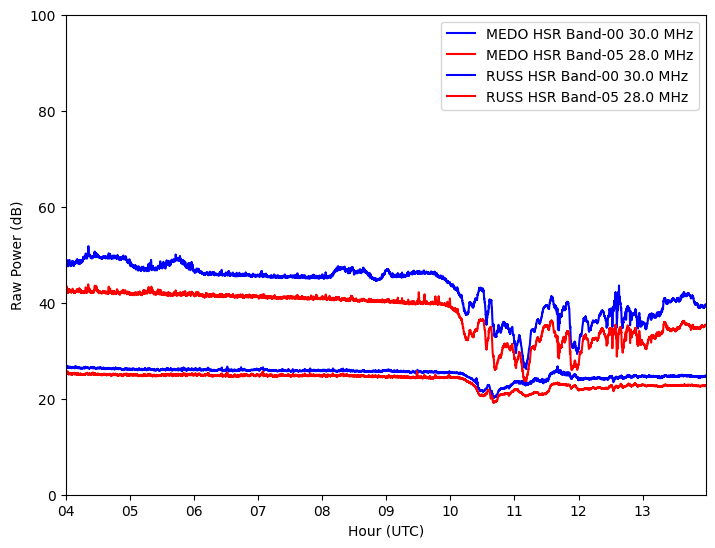

In [8]:
# Let's select the bands we are interested in plotting
hsr_bands = [0, 5]

rio.tools.plot(
    hsr_data_list,
    yrange=(0, 100),
    xrange=(start_plot_dt, end_plot_dt),
    hsr_bands=hsr_bands,
    color=['blue', 'red'],
    downsample_seconds=10,
)

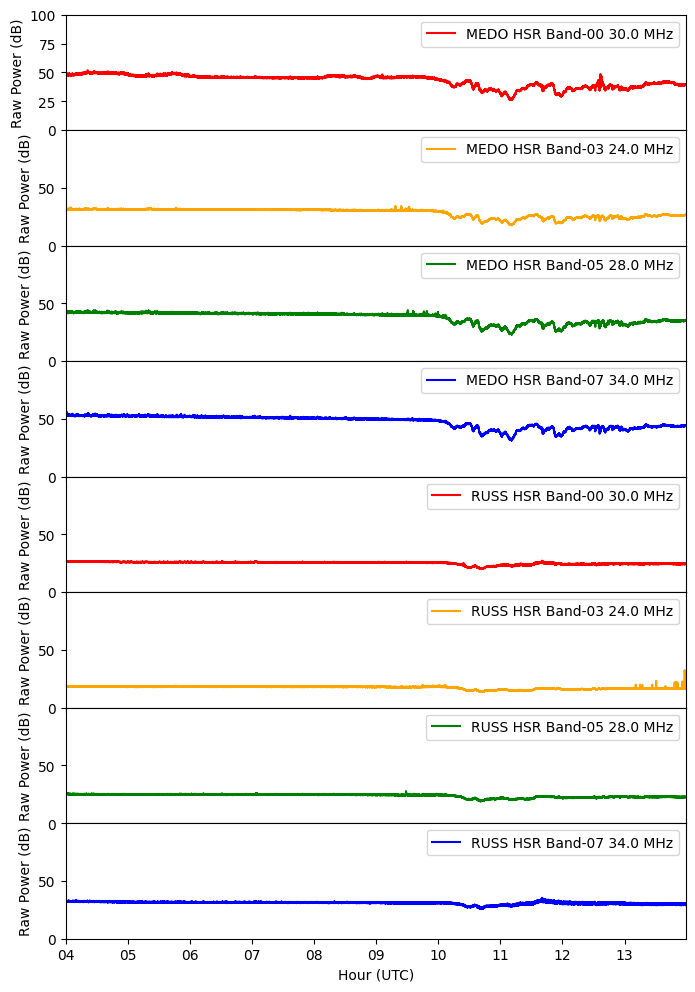

In [9]:
# If interested in a large number of bands, a stack-plot can be easier to read
# Let's make one!

# Again restrict our plotting range a bit in the time axis
plot_start_dt = datetime.datetime(2023, 11, 5, 4, 0)
plot_end_dt = datetime.datetime(2023, 11, 5, 13, 59)

# Let's select a few more bands
hsr_bands = [0, 3, 5, 7]
colors = ['red', 'orange', 'green', 'blue']

# Enable the stack plot option this time... let's also set the figure size manually
rio.tools.plot(
    hsr_data_list,
    yrange=(0, 100),
    xrange=(plot_start_dt, plot_end_dt),
    hsr_bands=hsr_bands,
    color=colors,
    stack_plot=True,
    figsize=(8, 12),
)